# 일주일 중 불이 가장 자주 나는 요일은?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['axes.unicode_minus'] = False

# 화재 데이터 로드
fire_data_path = './data/화재발생 건별 격자 정보/화재발생 건별 격자 정보/화재발생 건별 격자 정보_2023_서울/'
fire_files = glob(fire_data_path + '*.csv')

# 모든 파일 읽기
fire_df_list = []
for file in fire_files:
    try:
        df = pd.read_csv(file, encoding='euc-kr')
        fire_df_list.append(df)
    except:
        try:
            df = pd.read_csv(file, encoding='utf-8')
            fire_df_list.append(df)
        except:
            pass

# 데이터프레임 병합
fire_data = pd.concat(fire_df_list, ignore_index=True)

print(f"총 화재 건수: {len(fire_data)}")
print(f"데이터 컬럼: {fire_data.columns.tolist()}")
print(f"\n요일별 데이터 샘플:")
print(fire_data[['OCRN_YMD', 'DOW_NM']].head(10))

총 화재 건수: 5671
데이터 컬럼: ['GRID_ID', 'WRINV_NO', 'FIRE_TYPE_NM', 'TRGTOBJ_NM', 'BLDG_SRTFRM_NM', 'BLDG_STRCTR_NM', 'BLDG_SRTRF_NM', 'BLDG_RSCU_DNGCT', 'GRND_NOFL', 'UDGD_NOFL', 'BDST_GFA', 'BTTM_AREA', 'BLDG_STTS_NM', 'SPFPTG_NM', 'MNFTR_NTN_NM', 'CO_NM', 'PRDCT_NM', 'PRDCT_NO', 'MNFTR_YMD', 'SMTPR_LCLSF_NM', 'SMTPR_SCLSF_NM', 'DCSD_CNT', 'INJPSN_CNT', 'HNL_DAM_CNT', 'PRPT_DAM_AMT', 'OCRN_YR', 'SEASN_NM', 'QTR_NO', 'OCRN_YMD', 'OCRN_TM', 'OCRN_MM', 'OCRN_DAY', 'OCRN_HR', 'OCRN_MN', 'DOW_NM', 'FRSTN_NM', 'CNTR_NM', 'LFDAU_NM', 'RCPT_DT', 'DSPT_DT', 'GRNDS_ARVL_DT', 'BGNN_POTFR_DT', 'PRFECT_POTFR_DT', 'CBK_DT', 'DSPT_REQ_HR', 'FIRE_SUPESN_HR', 'CTPV_NM', 'SGG_NM', 'EMD_NM', 'CTY_FRMVL_SE_NM', 'EMD_SE_NM', 'LOT', 'LAT', 'FRSTN_GRNDS_DSTNC', 'CNTR_GRNDS_DSTNC', 'LFDAU_GRNDS_DSTNC', 'IGTN_HTSRC_NM', 'IGTN_HTSRC_SCLSF_NM', 'IGTN_DMNT_LCLSF_NM', 'IGTN_DMNT_SCLSF_NM', 'FRST_IGOBJ_LCLSF_NM', 'FRST_IGOBJ_SCLSF_NM', 'IGTN_ISTR_LCLSF_NM', 'IGTN_ISTR_SCLSF_NM', 'CMBS_EXPOBJ_LCLSF_NM', 'CMBS_EXPOBJ_SCL

요일별 화재 건수 및 비율
 요일  화재건수  비율(%)
월요일   858  15.13
화요일   778  13.72
수요일   794  14.00
목요일   797  14.05
금요일   834  14.71
토요일   805  14.20
일요일   805  14.20

✓ 그래프 저장 완료: ./results/요일별_화재_비율.png

✓ 그래프 저장 완료: ./results/요일별_화재_비율.png


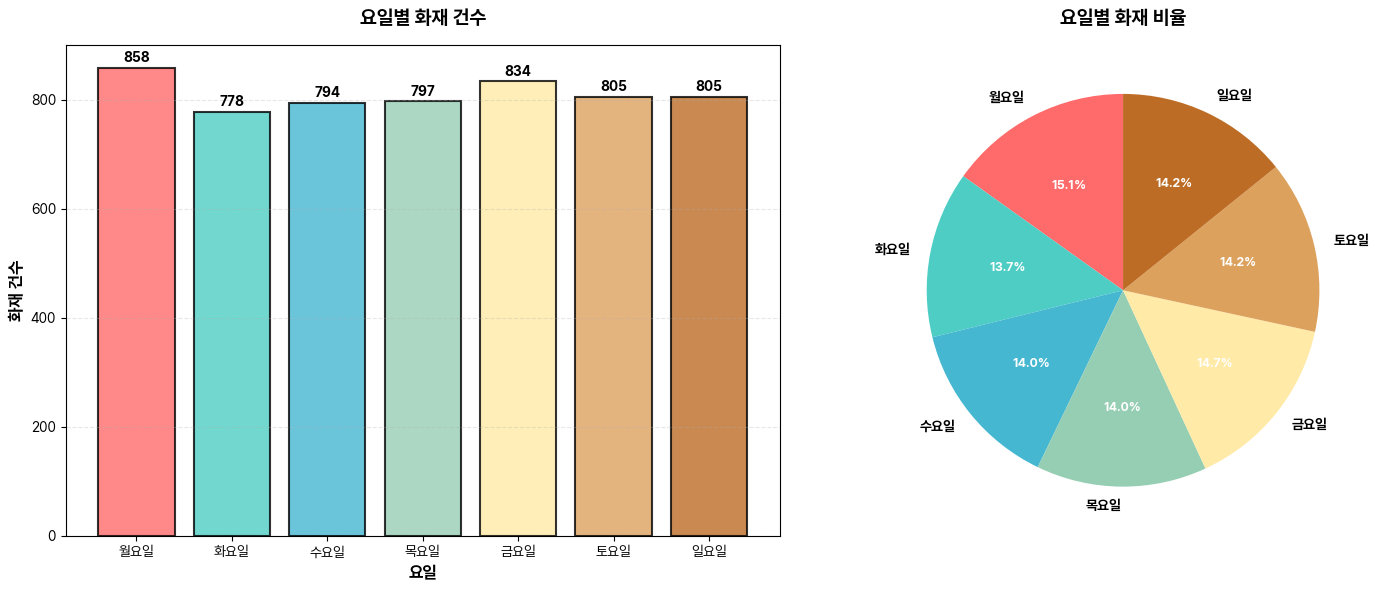

✓ 통계 결과 저장: ./results/요일별_화재통계.csv


In [2]:
# 요일별 화재 건수 계산
dow_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
dow_counts = fire_data['DOW_NM'].value_counts().reindex(dow_order)
dow_ratio = (dow_counts / dow_counts.sum() * 100).round(2)

# 결과 출력
print("=" * 50)
print("요일별 화재 건수 및 비율")
print("=" * 50)
result_df = pd.DataFrame({
    '요일': dow_order,
    '화재건수': [dow_counts[day] for day in dow_order],
    '비율(%)': [dow_ratio[day] for day in dow_order]
})
print(result_df.to_string(index=False))
print("=" * 50)

# results 디렉터리 생성
os.makedirs('./results', exist_ok=True)

# 그래프 1: 막대 그래프
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 막대 그래프
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA15E', '#BC6C25']
bars = axes[0].bar(range(len(dow_order)), [dow_counts[day] for day in dow_order], 
                    color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
axes[0].set_xlabel('요일', fontsize=12, fontweight='bold')
axes[0].set_ylabel('화재 건수', fontsize=12, fontweight='bold')
axes[0].set_title('요일별 화재 건수', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xticks(range(len(dow_order)))
axes[0].set_xticklabels(dow_order)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# 막대 위에 값 표시
for i, (bar, count) in enumerate(zip(bars, [dow_counts[day] for day in dow_order])):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                str(int(count)), ha='center', va='bottom', fontsize=10, fontweight='bold')

# 원 그래프 (비율)
wedges, texts, autotexts = axes[1].pie([dow_ratio[day] for day in dow_order], 
                                        labels=dow_order, autopct='%1.1f%%',
                                        colors=colors, startangle=90,
                                        textprops={'fontsize': 10, 'weight': 'bold'})
axes[1].set_title('요일별 화재 비율', fontsize=14, fontweight='bold', pad=15)

# 원 그래프 텍스트 스타일 조정
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(9)
    autotext.set_weight('bold')

plt.tight_layout()
plt.savefig('./results/요일별_화재_비율.png', dpi=300, bbox_inches='tight')
print("\n✓ 그래프 저장 완료: ./results/요일별_화재_비율.png")
plt.show()

# 결과 CSV 저장
result_df.to_csv('./results/요일별_화재통계.csv', index=False, encoding='utf-8')
print("✓ 통계 결과 저장: ./results/요일별_화재통계.csv")